```Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         09/24/17
Name:         Carl Frederick```

In [ ]:
import pandas as pd
import numpy as np

mta=pd.read_csv('turnstile_170708.txt')

In [4]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195566 entries, 0 to 195565
Data columns (total 11 columns):
C/A                                                                     195566 non-null object
UNIT                                                                    195566 non-null object
SCP                                                                     195566 non-null object
STATION                                                                 195566 non-null object
LINENAME                                                                195566 non-null object
DIVISION                                                                195566 non-null object
DATE                                                                    195566 non-null object
TIME                                                                    195566 non-null object
DESC                                                                    195566 non-null object
ENTRIES                           

mta.head()

In [5]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2017,00:00:00,REGULAR,6241669,2113493
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2017,04:00:00,REGULAR,6241693,2113495
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2017,08:00:00,REGULAR,6241706,2113522
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2017,12:00:00,REGULAR,6241794,2113615
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/01/2017,16:00:00,REGULAR,6241992,2113666


In [6]:
len(mta)

195566

In [8]:
mta.iloc[0]

C/A                                                                           A002
UNIT                                                                          R051
SCP                                                                       02-00-00
STATION                                                                      59 ST
LINENAME                                                                   NQR456W
DIVISION                                                                       BMT
DATE                                                                    07/01/2017
TIME                                                                      00:00:00
DESC                                                                       REGULAR
ENTRIES                                                                    6241669
EXITS                                                                      2113493
Name: 0, dtype: object

In [17]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

# **Challenge 1 using pandas/nonpandas hybrid, on first 1000 entries in mta**

In [349]:

d = {}
for i in range(1000): # to run on all entries in mta:  for i in range(len(mta)):
    try:
        d[(mta["C/A"][i], mta["UNIT"][i], mta["SCP"][i], mta["STATION"][i])] \
        .append(list(mta[mta.columns[4:]].iloc[i].values))
    except KeyError:
        d[(mta["C/A"][i], mta["UNIT"][i], mta["SCP"][i], mta["STATION"][i])] = list(mta[mta.columns[4:]].iloc[i].values)

        i = 0
for it in d.items():
    print(it)
    i++1
    if i>5:
        break


(('A002', 'R051', '02-00-00', '59 ST'), ['NQR456W', 'BMT', '07/01/2017', '00:00:00', 'REGULAR', 6241669, 2113493, '59 ST NQR456W', ['NQR456W', 'BMT', '07/01/2017', '04:00:00', 'REGULAR', 6241693, 2113495, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/01/2017', '08:00:00', 'REGULAR', 6241706, 2113522, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/01/2017', '12:00:00', 'REGULAR', 6241794, 2113615, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/01/2017', '16:00:00', 'REGULAR', 6241992, 2113666, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/01/2017', '20:00:00', 'REGULAR', 6242258, 2113707, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/02/2017', '00:00:00', 'REGULAR', 6242391, 2113725, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/02/2017', '04:00:00', 'REGULAR', 6242425, 2113728, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/02/2017', '08:00:00', 'REGULAR', 6242442, 2113753, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/02/2017', '12:00:00', 'REGULAR', 6242507, 2113825, '59 ST NQR456W'], ['NQR456W', 'BMT', '07/02/2017', '16:00:0

**TA COMMENT:**

I see what you were trying to do, but for the first three problems in this challenge set the purpose was to show that the use of python dictionaries to manually do data groupings can be replaced with loading a csv file into a pandas dataframe. 

# **Challenge 2 - pandas/nonpandas hybrid**

In [345]:
# Run on just the first 1000 entries in mta
from dateutil import parser
from collections import defaultdict
d = defaultdict(list)
for i in range(1000):  # to run on all: for i in range(len(mta)):
    mydate = parser.parse(mta["DATE"][i]+" "+mta["TIME"][i])
    d[tuple(mta[mta.columns[:4]].iloc[i].values)].append([mydate, mta["ENTRIES"][i]])
                                                        
d[('A002', 'R051', '02-00-00', '59 ST')]

[[datetime.datetime(2017, 7, 1, 0, 0), 6241669],
 [datetime.datetime(2017, 7, 1, 4, 0), 6241693],
 [datetime.datetime(2017, 7, 1, 8, 0), 6241706],
 [datetime.datetime(2017, 7, 1, 12, 0), 6241794],
 [datetime.datetime(2017, 7, 1, 16, 0), 6241992],
 [datetime.datetime(2017, 7, 1, 20, 0), 6242258],
 [datetime.datetime(2017, 7, 2, 0, 0), 6242391],
 [datetime.datetime(2017, 7, 2, 4, 0), 6242425],
 [datetime.datetime(2017, 7, 2, 8, 0), 6242442],
 [datetime.datetime(2017, 7, 2, 12, 0), 6242507],
 [datetime.datetime(2017, 7, 2, 16, 0), 6242679],
 [datetime.datetime(2017, 7, 2, 20, 0), 6242887],
 [datetime.datetime(2017, 7, 3, 0, 0), 6242999],
 [datetime.datetime(2017, 7, 3, 4, 0), 6243015],
 [datetime.datetime(2017, 7, 3, 8, 0), 6243034],
 [datetime.datetime(2017, 7, 3, 12, 0), 6243139],
 [datetime.datetime(2017, 7, 3, 16, 0), 6243461],
 [datetime.datetime(2017, 7, 3, 20, 0), 6243885],
 [datetime.datetime(2017, 7, 4, 0, 0), 6244031],
 [datetime.datetime(2017, 7, 4, 4, 0), 6244045],
 [datetime.

In [352]:
# This was my original answer to Challenge 3
# I found that I had misinterpreted the question/got it wrong.
#mta.groupby(['C/A','UNIT','SCP','STATION','DATE']).aggregate(np.sum)

In [351]:
# This is just some work trying to identify Brooklyn stations used in the project
# brook was assembled by hand from web sources identifying Brooklyn stations, comparing to the STATIONS in mta
for i in range(len(brook)):
    #print()
    #print (brook[i])
    #print(df_temp[df_temp['STATION'].str.startswith(brook[i])][["STATION","DIVISION"]])
    pass

# **Challenge three** - supplied solution with my notes

In [633]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [634]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [635]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [636]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [637]:
from datetime import datetime as dt

In [638]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [639]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [640]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186607,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,00:00:00,REGULAR,12079591,2684445,2016-08-27 00:00:00
186608,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,04:00:00,REGULAR,12079636,2684479,2016-08-27 04:00:00
186609,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,08:00:00,REGULAR,12079894,2684489,2016-08-27 08:00:00
186610,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,12:00:00,REGULAR,12080369,2684533,2016-08-27 12:00:00
186611,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,16:00:00,REGULAR,12080831,2684606,2016-08-27 16:00:00


In [641]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [642]:
# Get rid of the duplicate entry
# Also, sort in place so the latest value for each day comes first
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [643]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


In [644]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [645]:
# Now groupby date to collect all the day entries.  Because we sorted earlier, the first entry for a date
# will have the last datapoint for that day, which is the cumulative entries up to that point.
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [646]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [647]:
# Create columns for date/entries shifted by one day, to prepare to subtract yesterday's entries from today's.
# This will ultimately leave us with just the entries for each day
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [648]:
# Note that the first row will be missing the previous day values since there was nothing to shift into them.
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


In [649]:
# Drop that first row by dropping null rows
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [650]:
# Check to see that ENTRIES is always greater than PREV_ENTRIES.  Some are not!
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0


In [651]:
# Check a single date to see how ENTRIES changes throughout the day.  The ENTRIES drops throughout the day!  What?
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,2016-08-27 04:00:00
1441,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,00:00:00,887690958,2016-08-27 00:00:00


In [652]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         20
             01-00-04  57 ST-7 AV         17
             01-00-05  57 ST-7 AV         20
A016   R081  03-06-01  49 ST               1
A025   R023  01-03-02  34 ST-HERALD SQ    20
A049   R088  02-05-00  CORTLANDT ST       15
A066   R118  00-00-00  CANAL ST           20
C019   R232  00-00-02  45 ST              20
H003   R163  01-00-02  6 AV               20
H023   R236  00-06-00  DEKALB AV          20
J034   R007  00-00-02  104 ST             20
JFK01  R535  00-00-01  HOWARD BCH JFK      1
             00-00-02  HOWARD BCH JFK      1
             00-00-03  HOWARD BCH JFK      2
JFK02  R535  01-00-01  HOWARD BCH JFK      1
             01-00-02  HOWARD BCH JFK      1
             01-00-03  HOWARD BCH JFK      1
             01-00-04  HOWARD BCH JFK      1
             01-00-05  HOWARD BCH JFK      1
             01-00-06  HOWARD BCH JFK      1
JFK03  R536  00-00-01  JFK JAMAICA CT1     2
             00-

In [653]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


**TA COMMENT:**

I think this operation can be done without using the apply method by filtering the dataframe directly. For example, 
- turnstiles_daily['ENTRIES_DIFF'] = turnstiles_daily['ENTRIES'] - turnstiles_daily['PREV_ENTRIES']
- turnstiles_daily[turnstiles_daily['ENTRIES_DIFF'] > 1000000] = 0


In [658]:
turnstiles_daily[turnstiles_daily.STATION == 'RIT-MANHATTAN'].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
95793,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/28/2016,292956,08/27/2016,290707.0,2249.0
95794,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/29/2016,294510,08/28/2016,292956.0,1554.0
95795,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/30/2016,295898,08/29/2016,294510.0,1388.0
95796,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/31/2016,297225,08/30/2016,295898.0,1327.0
95797,TRAM1,R468,00-00-00,RIT-MANHATTAN,09/01/2016,298335,08/31/2016,297225.0,1110.0


# **Challenge 4**

In [655]:
%matplotlib inline
import matplotlib.pyplot as plt

In [659]:
mask = ((turnstiles_daily["C/A"] == "TRAM1") & 
(turnstiles_daily["UNIT"] == "R468") & 
(turnstiles_daily["SCP"] == "00-00-00") & 
(turnstiles_daily["STATION"] == "RIT-MANHATTAN"))
turnstiles_daily[mask].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
95793,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/28/2016,292956,08/27/2016,290707.0,2249.0
95794,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/29/2016,294510,08/28/2016,292956.0,1554.0
95795,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/30/2016,295898,08/29/2016,294510.0,1388.0
95796,TRAM1,R468,00-00-00,RIT-MANHATTAN,08/31/2016,297225,08/30/2016,295898.0,1327.0
95797,TRAM1,R468,00-00-00,RIT-MANHATTAN,09/01/2016,298335,08/31/2016,297225.0,1110.0


In [661]:
dates, counts = pd.to_datetime(turnstiles_daily[mask]["DATE"]), turnstiles_daily[mask]["DAILY_ENTRIES"]

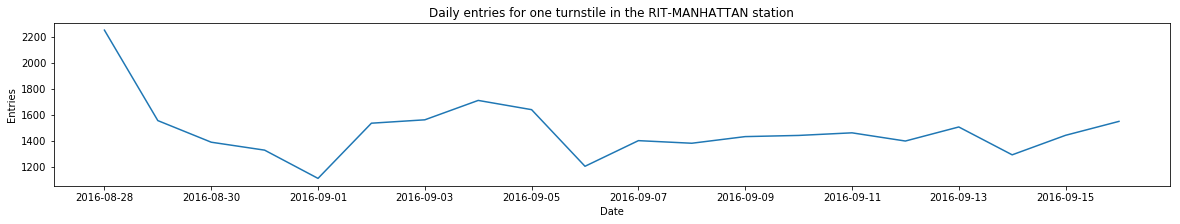

In [663]:
# The result here looks a bit suspect in that there are days when entries exceeds 600000.  If that seems to high we
# could reduce the max_entries in the previous code to somewhat less than 1 million.

plt.figure(figsize=(20,3))
plt.title("Daily entries for one turnstile in the RIT-MANHATTAN station")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.plot(dates,counts);

# **Challenge 5**

In [665]:
turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"]).DAILY_ENTRIES.agg(np.sum).head()

C/A   UNIT  STATION  DATE      
A002  R051  59 ST    08/28/2016     7896.0
                     08/29/2016    15462.0
                     08/30/2016    16622.0
                     08/31/2016    16557.0
                     09/01/2016    16464.0
Name: DAILY_ENTRIES, dtype: float64

# **Challenge 6**

In [666]:
turnstiles_daily.groupby(["STATION", "DATE"]).DAILY_ENTRIES.agg(np.sum).head()

STATION  DATE      
1 AV     08/28/2016    13871.0
         08/29/2016    18064.0
         08/30/2016    19182.0
         08/31/2016    19616.0
         09/01/2016    20170.0
Name: DAILY_ENTRIES, dtype: float64

# **Challenge 7**

In [668]:
srit = turnstiles_daily[turnstiles_daily['STATION']=='RIT-MANHATTAN'].groupby(["STATION", "DATE"]).agg(np.sum)

In [669]:
srit = srit.reset_index()

In [670]:
dates, counts = pd.to_datetime(srit["DATE"]), srit["DAILY_ENTRIES"]

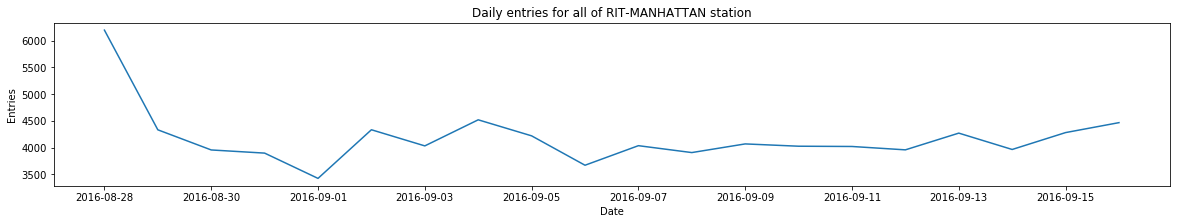

In [672]:
plt.figure(figsize=(20,3))
plt.title("Daily entries for all of RIT-MANHATTAN station")
plt.xlabel("Date")
plt.ylabel("Entries")
plt.plot(dates,counts);

# **Challenge 8**

In [673]:
week_nums = [160903, 160910, 160917, 160924, 161001, 161008]
turnstiles_df = get_data(week_nums)

In [674]:
turnstiles_df.DATE.unique()

array(['08/27/2016', '08/28/2016', '08/29/2016', '08/30/2016',
       '08/31/2016', '09/01/2016', '09/02/2016', '09/03/2016',
       '09/04/2016', '09/05/2016', '09/06/2016', '09/07/2016',
       '09/08/2016', '09/09/2016', '09/10/2016', '09/11/2016',
       '09/12/2016', '09/13/2016', '09/14/2016', '09/15/2016',
       '09/16/2016', '09/17/2016', '09/18/2016', '09/19/2016',
       '09/20/2016', '09/21/2016', '09/22/2016', '09/23/2016',
       '09/24/2016', '09/25/2016', '09/26/2016', '09/27/2016',
       '09/28/2016', '09/29/2016', '09/30/2016', '10/01/2016',
       '10/02/2016', '10/03/2016', '10/04/2016', '10/05/2016',
       '10/06/2016', '10/07/2016'], dtype=object)

In [675]:
days = list(turnstiles_df.DATE.unique())

In [676]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [677]:
turnstiles_df.sort_values(["STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["STATION", "DATE_TIME"], inplace=True)

In [678]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [679]:
turnstiles_daily = turnstiles_df.groupby(["STATION", "DATE"]).ENTRIES.first().reset_index()

**TA COMMENT:**

So, this part of the code seems to be copied from above. If you find yourself copying code, then it might be good to step back and create helper functions. Having repeating code makes the code prone to error. 

In [680]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [681]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [682]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

541 117440636.0
117440637 541.0
2245666 764927.0
143039 2245666.0
2272925 795211.0
9944 2272925.0
7277694 5450418.0
5451593 7277694.0
2280848 11922122.0
11926520 2280848.0
2360401 74265.0
75577 2360401.0
16827861 75577.0
11650019 4812441.0
4814218 11650019.0
594 5119278.0
5121322 594.0
1151 6160580.0
2981490 1884735.0
1888326 2981490.0
3777276 8173287.0
1123851 4294646.0
4297751 1123851.0
1874971 87856.0
88559 1880964.0
1886756 604397.0
606027 1886756.0
1895131 608850.0
610522 1895131.0
1903271 613146.0
614519 1903271.0
1907785 53645.0
15299757 3406661.0
3408678 15299757.0
5624202 12122410.0
12124070 5624202.0
1153109 28987.0
69778 1153109.0
1164497 30265.0
2470 1164497.0
3747 1177828.0
2592610 31649.0
187470 1661064.0
2349237 287804.0
282718 2349237.0
2606603 282718.0
5610 2606603.0
2360690 299649.0
2718 1679006.0
1218332 189361.0
183580 1218332.0
2373034 183580.0
297390 2373034.0
1395911 2548230.0
2550112 1395911.0
86046 8758274.0
8764189 86046.0
3713988 13461834.0
13465533 3713988.0

In [683]:
turnstiles_daily.head()

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1 AV,08/28/2016,11451910,08/27/2016,11450095.0,1815.0
2,1 AV,08/29/2016,11455137,08/28/2016,11451910.0,3227.0
3,1 AV,08/30/2016,11458724,08/29/2016,11455137.0,3587.0
4,1 AV,08/31/2016,11462054,08/30/2016,11458724.0,3330.0
5,1 AV,09/01/2016,11465561,08/31/2016,11462054.0,3507.0


In [684]:
srit = turnstiles_daily[turnstiles_daily['STATION']=='RIT-MANHATTAN'].groupby(["STATION", "DATE"]).agg(np.sum)

In [685]:
srit = srit.reset_index()
srit.head()

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,RIT-MANHATTAN,08/28/2016,292956,290707.0,2249.0
1,RIT-MANHATTAN,08/29/2016,294510,292956.0,1554.0
2,RIT-MANHATTAN,08/30/2016,295898,294510.0,1388.0
3,RIT-MANHATTAN,08/31/2016,297225,295898.0,1327.0
4,RIT-MANHATTAN,09/01/2016,298335,297225.0,1110.0


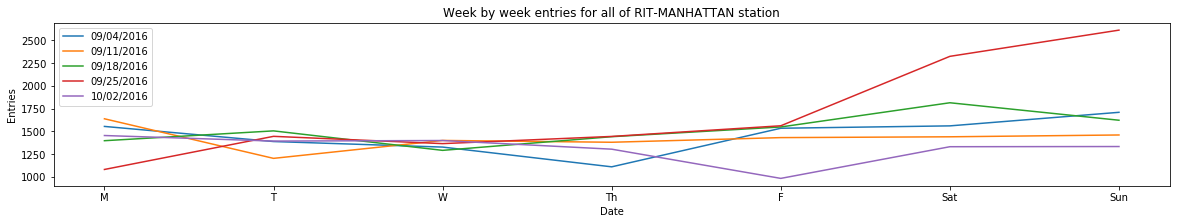

In [707]:
plt.figure(figsize=(20,3))
plt.title("Week by week entries for all of RIT-MANHATTAN station")
plt.xlabel("Date")
plt.ylabel("Entries")

x = range(7)
plt.xticks(x,['M', 'T', 'W', 'Th', 'F', 'Sat', 'Sun'])

for start in range(2,2+5*7,7):
    week = []
    for day in days[start:start+7]:
        week.append(int(srit[srit.DATE==day].DAILY_ENTRIES))
    plt.plot(x,week, label=day)
    
plt.legend(loc="upper left")

**TA COMMENT:**

For line plots with multiples series, it would be good to make the plot taller so that the lines can be more distinguishable. 

# **Challenge 9**

In [688]:
# Get the daily volume again
turnstiles_daily = turnstiles_df.groupby(["STATION", "DATE"]).ENTRIES.first().reset_index()

In [689]:
turnstiles_daily.head()

,STATION,DATE,ENTRIES
0,1 AV,08/27/2016,11450095
1,1 AV,08/28/2016,11451910
2,1 AV,08/29/2016,11455137
3,1 AV,08/30/2016,11458724
4,1 AV,08/31/2016,11462054


In [690]:
# Shift by 7 days so we can capture the weekly volume
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(7)))
turnstiles_daily.head(20)

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,1 AV,08/27/2016,11450095,NaN,NaN
1,1 AV,08/28/2016,11451910,NaN,NaN
2,1 AV,08/29/2016,11455137,NaN,NaN
3,1 AV,08/30/2016,11458724,NaN,NaN
4,1 AV,08/31/2016,11462054,NaN,NaN
5,1 AV,09/01/2016,11465561,NaN,NaN
6,1 AV,09/02/2016,11469088,NaN,NaN
7,1 AV,09/03/2016,11471057,08/27/2016,11450095.0
8,1 AV,09/04/2016,11472787,08/28/2016,11451910.0
9,1 AV,09/05/2016,11474447,08/29/2016,11455137.0


**TA COMMENT:**

This was a clever idea but since the counter resets for the MTA data it might not be a good idea to shift the entries by 7 days. If you use the datetime methods built into pandas (ex: df['DATE'].dt.week) you can get the numerical representation of which week each day belongs to. Then, using a groupby you could aggregate the daily entries.

In [691]:
# Drop the null rows created by shifting
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily.head(20)

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
7,1 AV,09/03/2016,11471057,08/27/2016,11450095.0
8,1 AV,09/04/2016,11472787,08/28/2016,11451910.0
9,1 AV,09/05/2016,11474447,08/29/2016,11455137.0
10,1 AV,09/06/2016,11478021,08/30/2016,11458724.0
11,1 AV,09/07/2016,11481801,08/31/2016,11462054.0
12,1 AV,09/08/2016,11486146,09/01/2016,11465561.0
13,1 AV,09/09/2016,11490426,09/02/2016,11469088.0
14,1 AV,09/10/2016,11493207,09/03/2016,11471057.0
15,1 AV,09/11/2016,11495266,09/04/2016,11472787.0
16,1 AV,09/12/2016,11498663,09/05/2016,11474447.0


In [692]:
# sbtract PREV_ENTRIES from ENTRIES to get a week of entries for each date
turnstiles_daily["WEEKLY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

541 117440634.0
2245666 19008.0
11370 2245666.0
2272925 299993.0
7277694 5444619.0
5457740 7277694.0
11942358 2280848.0
2360401 60318.0
16827861 62436.0
16830412 64951.0
16833495 68076.0
16836651 71195.0
16839636 74265.0
16842633 2360401.0
16843836 75577.0
11650019 4805886.0
4821549 11650019.0
594 5108274.0
5131855 594.0
1151 6153206.0
1773 6153849.0
3035 6155196.0
3604 6156562.0
3933 6157965.0
3933 6159326.0
4675 6160580.0
2981490 1877577.0
1897896 2981490.0
3778640 8173287.0
1123851 4282394.0
603530 1874971.0
604397 1876423.0
606027 1879095.0
606147 1880050.0
606147 1880964.0
1907785 612265.0
1909477 613146.0
1911867 614519.0
1912118 53144.0
1912118 53144.0
1913059 53645.0
15299757 3400964.0
3414807 15299757.0
5624202 12112976.0
12133384 5624202.0
2592610 907.0
1661064 271570.0
19383 1177828.0
2349237 476.0
5610 1661064.0
1679006 282718.0
2718 2606603.0
1218332 19451.0
297390 1679006.0
1395911 2545031.0
2553309 1395911.0
86046 8743342.0
8779657 86046.0
3713988 13451265.0
13475475 371

In [694]:
turnstiles_daily.head(20)

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,WEEKLY_ENTRIES
7,1 AV,09/03/2016,11471057,08/27/2016,11450095.0,20962.0
8,1 AV,09/04/2016,11472787,08/28/2016,11451910.0,20877.0
9,1 AV,09/05/2016,11474447,08/29/2016,11455137.0,19310.0
10,1 AV,09/06/2016,11478021,08/30/2016,11458724.0,19297.0
11,1 AV,09/07/2016,11481801,08/31/2016,11462054.0,19747.0
12,1 AV,09/08/2016,11486146,09/01/2016,11465561.0,20585.0
13,1 AV,09/09/2016,11490426,09/02/2016,11469088.0,21338.0
14,1 AV,09/10/2016,11493207,09/03/2016,11471057.0,22150.0
15,1 AV,09/11/2016,11495266,09/04/2016,11472787.0,22479.0
16,1 AV,09/12/2016,11498663,09/05/2016,11474447.0,24216.0


In [695]:
weekly = turnstiles_daily[(turnstiles_daily.DATE == '09/03/2016')
                         |(turnstiles_daily.DATE == '09/10/2016')
                         |(turnstiles_daily.DATE == '09/17/2016')
                         |(turnstiles_daily.DATE == '09/24/2016')
                         ]

In [696]:
heaviest = weekly.groupby("STATION").agg(np.sum).sort_values(["WEEKLY_ENTRIES"], ascending=[False])

In [697]:
heaviest.head(10)

,ENTRIES,PREV_ENTRIES,WEEKLY_ENTRIES
STATION,,,
NEWARK BM BW,2299450,2862891.0,2184680.0
9TH STREET,3150015,4006028.0,2139097.0
GROVE STREET,1135103,1230549.0,2026772.0
LEXINGTON AV/63,7119948,7063422.0,1245243.0
PAVONIA/NEWPORT,2118769,1910695.0,951236.0
CHRISTOPHER ST,3761319,2945574.0,815745.0
THIRTY THIRD ST,3097136,2980818.0,772830.0
14TH STREET,3027893,2268872.0,759021.0
CITY / BUS,2085521,2080061.0,548600.0


# **Challenge 10**

In [698]:
heaviest = heaviest.reset_index()
stations, counts = list(heaviest.STATION), list(heaviest.WEEKLY_ENTRIES)

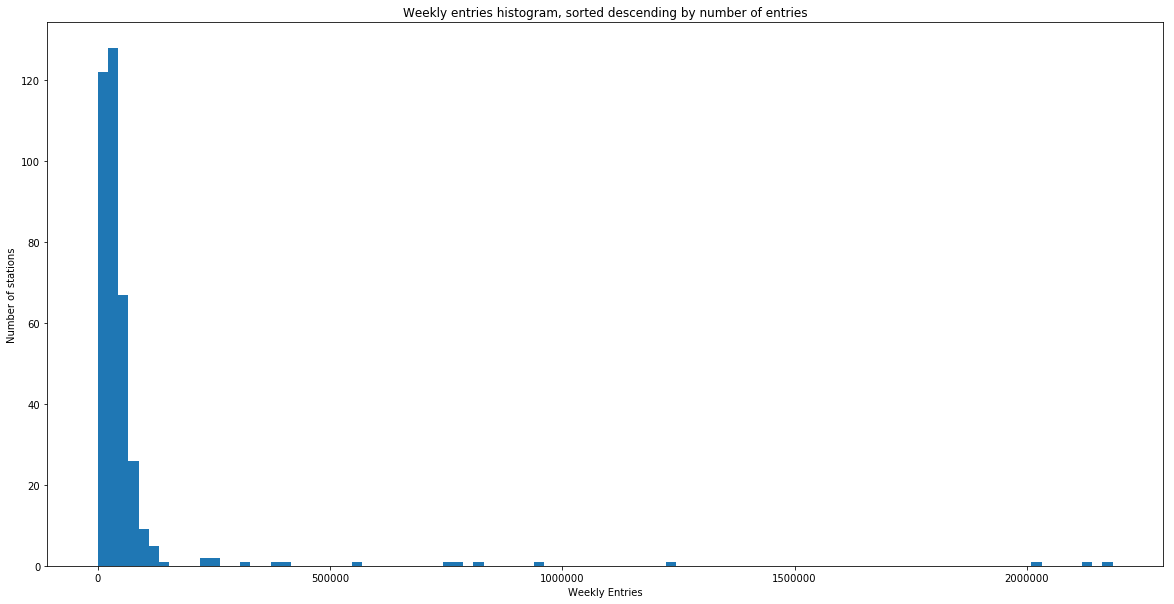

In [705]:
plt.figure(figsize=(20,10))
plt.title("Weekly entries histogram, sorted descending by number of entries")
plt.ylabel("Number of stations")
plt.xlabel("Weekly Entries")
plt.hist(counts, bins=100);

**TA COMMENT:**

Overall, you did a great job using pandas to manipulate the MTA data. There are more specific comments throughout the notebook that is directed at specific lines of code. A few general comments would be:
1. Use helper functions whenever you find yourself copying code from one part of the notebook to another.
2. Try not to go through dataframes row-by-row (get_daily_counts helper function). Dataframes aren't optimized to have functions applied row-by-row.